## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

## Load the dataset into a Pandas dataframe

In [2]:
df = pd.read_csv('traffic_new.csv')
df.head()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic,year,month,day,is_weekend
0,2017-09-24,Saturday,6,32,21,38,Normal,2017,9,24,1
1,2017-02-12,Saturday,6,103,36,16,Normal,2017,2,12,1
2,2017-08-14,Sunday,7,79,21,15,Normal,2017,8,14,1
3,2017-05-15,Sunday,7,65,13,40,Normal,2017,5,15,1
4,2017-04-16,Saturday,6,93,36,20,Normal,2017,4,16,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5000 non-null   object
 1   Day          5000 non-null   object
 2   CodedDay     5000 non-null   int64 
 3   Zone         5000 non-null   int64 
 4   Weather      5000 non-null   int64 
 5   Temperature  5000 non-null   int64 
 6   Traffic      5000 non-null   object
 7   year         5000 non-null   int64 
 8   month        5000 non-null   int64 
 9   day          5000 non-null   int64 
 10  is_weekend   5000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 429.8+ KB


In [4]:
df.describe()

,CodedDay,Zone,Weather,Temperature,year,month,day,is_weekend
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000
mean,4.008600,71.948600,23.413000,25.517400,2017.0,6.596400,15.903600,0.284200
std,1.998631,33.517665,13.718559,11.644776,0.0,3.414826,8.746748,0.451078
min,1.000000,15.000000,0.000000,6.000000,2017.0,1.000000,1.000000,0.000000
25%,2.000000,42.000000,11.750000,15.000000,2017.0,4.000000,8.000000,0.000000
50%,4.000000,72.000000,23.000000,26.000000,2017.0,7.000000,16.000000,0.000000
75%,6.000000,101.000000,35.000000,36.000000,2017.0,10.000000,23.250000,1.000000
max,7.000000,130.000000,47.000000,45.000000,2017.0,12.000000,31.000000,1.000000


In [5]:
df.corr()

,CodedDay,Zone,Weather,Temperature,year,month,day,is_weekend
CodedDay,1.000000,-0.016680,0.003591,-0.003423,NaN,-0.024376,0.021846,0.788761
Zone,-0.016680,1.000000,-0.000206,0.010902,NaN,-0.000887,0.019231,-0.032548
Weather,0.003591,-0.000206,1.000000,-0.002817,NaN,0.001449,0.019810,0.009217
Temperature,-0.003423,0.010902,-0.002817,1.000000,NaN,0.006792,0.006651,-0.012881
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.024376,-0.000887,0.001449,0.006792,NaN,1.000000,0.014925,-0.023958
day,0.021846,0.019231,0.019810,0.006651,NaN,0.014925,1.000000,0.022916
is_weekend,0.788761,-0.032548,0.009217,-0.012881,NaN,-0.023958,0.022916,1.000000


## Basic Visualization

<AxesSubplot:>

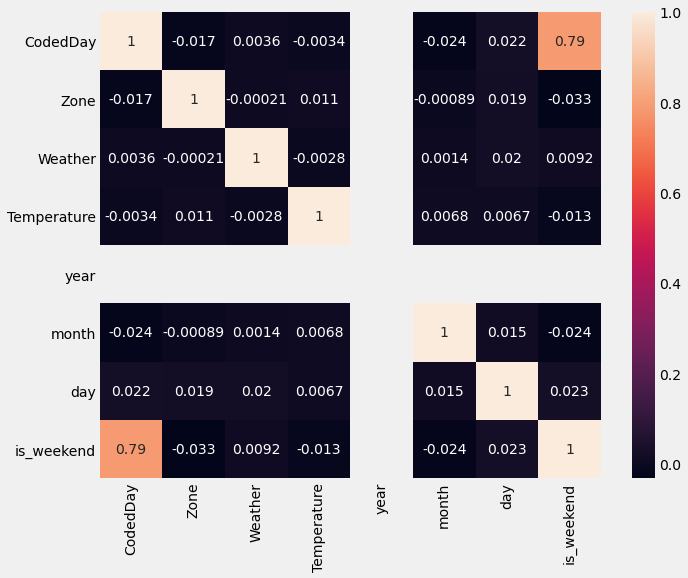

In [6]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='Traffic', ylabel='count'>

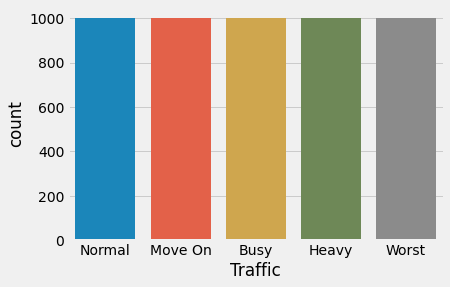

In [7]:
sns.countplot(x=df.Traffic)

<AxesSubplot:xlabel='Day', ylabel='count'>

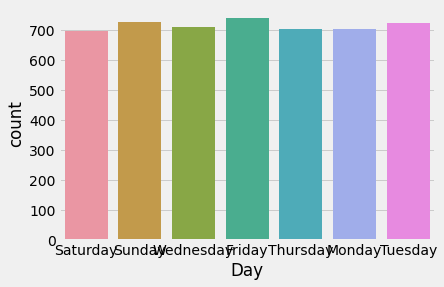

In [14]:
sns.countplot(x=df.Day)

## Neural Network

In [9]:
cols = list(df.columns.values)
print(cols)

['Date', 'Day', 'CodedDay', 'Zone', 'Weather', 'Temperature', 'Traffic', 'year', 'month', 'day', 'is_weekend']


In [10]:
df = df[['Day', 'CodedDay', 'Zone', 'Weather', 'Temperature','year', 'month', 'day', 'is_weekend','Traffic']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          5000 non-null   object
 1   CodedDay     5000 non-null   int64 
 2   Zone         5000 non-null   int64 
 3   Weather      5000 non-null   int64 
 4   Temperature  5000 non-null   int64 
 5   year         5000 non-null   int64 
 6   month        5000 non-null   int64 
 7   day          5000 non-null   int64 
 8   is_weekend   5000 non-null   int64 
 9   Traffic      5000 non-null   object
dtypes: int64(8), object(2)
memory usage: 390.8+ KB


In [15]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Day']= label_encoder.fit_transform(df['Day'])
df['Traffic']= label_encoder.fit_transform(df['Traffic'])

df['Day'].unique()
df['Traffic'].unique()

array([3, 2, 0, 1, 4])

In [16]:
X = df.drop('Traffic', axis =1).values
y = df['Traffic'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [17]:
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

# GMAN

In [18]:
def gman():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [19]:
model = gman()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 9)]               0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1280      
_________________________________________________________________
BC1 (BatchNormalization)     (None, 128)               512       
_________________________________________________________________
Activation1 (Activation)     (None, 128)               0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
BC2 (BatchNormalization)     (None, 128)              

### Compile and fit the model

In [20]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Define callbacks.

In [21]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [25]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

### Metrics

In [26]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    

Training set:
	Accuracy:0.203
	Classification Report
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       711
           1       0.20      1.00      0.34       710
           2       0.00      0.00      0.00       698
           3       0.00      0.00      0.00       682
           4       0.00      0.00      0.00       699

    accuracy                           0.20      3500
   macro avg       0.11      0.20      0.07      3500
weighted avg       0.11      0.20      0.07      3500

Dev set:
	Accuracy:0.200
	Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.20      1.00      0.33       150
           2       0.00      0.00      0.00       163
           3       0.00      0.00      0.00       161
           4       0.00      0.00      0.00       145

    accuracy                           0.20       750
   macro avg       0.04      0

# Attention

In [27]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from torchvision.transforms import ToTensor
import pandas as pd
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          5000 non-null   int32
 1   CodedDay     5000 non-null   int64
 2   Zone         5000 non-null   int64
 3   Weather      5000 non-null   int64
 4   Temperature  5000 non-null   int64
 5   year         5000 non-null   int64
 6   month        5000 non-null   int64
 7   day          5000 non-null   int64
 8   is_weekend   5000 non-null   int64
 9   Traffic      5000 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 351.7 KB


In [29]:
num_rows=df.shape[0]
num_rows

5000

In [30]:
num_cols=df.shape[1]
num_cols

10

In [31]:
input_cols=df.columns[:-1]
input_cols

Index(['Day', 'CodedDay', 'Zone', 'Weather', 'Temperature', 'year', 'month',
       'day', 'is_weekend'],
      dtype='object')

In [32]:
target_col=df.columns[-1:]
target_col

Index(['Traffic'], dtype='object')

In [33]:
df.Traffic.value_counts()

3    1000
2    1000
0    1000
1    1000
4    1000
Name: Traffic, dtype: int64

In [34]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
   
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[target_col].to_numpy()
    return inputs_array, targets_array

In [35]:
inputs_array, targets_array = dataframe_to_arrays(df)

In [36]:
inputs = torch.from_numpy(np.array(inputs_array,dtype='float32'))

targets = torch.from_numpy(np.array(targets_array,dtype='float32'))

In [37]:
inputs.dtype

torch.float32

In [38]:
targets.dtype

torch.float32

In [39]:
from torch.utils.data import DataLoader, TensorDataset, random_split
dataset = TensorDataset(inputs, targets)

In [40]:
test_percent = 0.15
num_rows=len(inputs)
test_size = int(num_rows * test_percent)
train_size = num_rows - test_size


train_ds, test_ds = random_split(dataset,[train_size,test_size])

In [41]:
batch_size=1

In [42]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size)

In [43]:
for data, target in train_loader:
    print("inputs:", data)
    print("targets:", target)
    break

inputs: tensor([[5.0000e+00, 2.0000e+00, 8.6000e+01, 3.2000e+01, 2.1000e+01, 2.0170e+03,
         3.0000e+00, 1.0000e+00, 0.0000e+00]])
targets: tensor([[1.]])


In [44]:
input_size = len(input_cols)
output_size = len(target_col)

In [45]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [46]:
len(train_loader)

4250

# STGCN

In [47]:
class STGCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)                
        
    def forward(self, xb):
        out = self.linear(xb)    
        out=F.sigmoid(out)                    
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)         
        # Calcuate loss
        loss = F.binary_cross_entropy(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.binary_cross_entropy(out, targets)                              
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [48]:
model = STGCN()

In [49]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2680, -0.0157,  0.0866, -0.2596, -0.0237,  0.1296, -0.2415,  0.2388,
          -0.1043]], requires_grad=True),
 Parameter containing:
 tensor([0.2392], requires_grad=True)]

In [50]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [51]:
result = evaluate(model,test_loader) # Use the the evaluate function
print(result)

{'val_loss': -94.4000015258789}


C:\Users\Public\anaconda3\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [52]:
epochs = 30
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, test_loader)

Epoch [20], val_loss: -94.4000
Epoch [30], val_loss: -94.4000


In [53]:
val_loss = evaluate(model,test_loader)
val_loss

{'val_loss': -94.4000015258789}

In [54]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)           # fill this
    prediction =predictions[0].detach()
    if(prediction>=0.5):
        prediction=np.array(1)
    else:
        prediction=np.array(0)
    prediction=np.array(prediction)
    prediction = torch.from_numpy(np.array(prediction,dtype='float32'))
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    return prediction,target
    

In [55]:
pred=[]
actual=[]
for i in range(len(test_ds)):
    input, target = test_ds[i]
    val,act=predict_single(input, target, model)
  
  
    pred.append(val)
    actual.append(act)

pred=np.array(pred)
pred = torch.from_numpy(np.array(pred,dtype='float32'))
  

Input: tensor([0.0000e+00, 5.0000e+00, 7.0000e+01, 1.9000e+01, 4.2000e+01, 2.0170e+03,
        2.0000e+00, 1.1000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 1.5000e+01, 3.7000e+01, 3.0000e+01, 2.0170e+03,
        8.0000e+00, 2.1000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 8.7000e+01, 1.5000e+01, 4.3000e+01, 2.0170e+03,
        1.0000e+00, 2.5000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   24.,   28.,   41., 2017.,    5.,   13.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 1.0500e+02, 9.0000e+00, 3.9000e+01, 2.0170e+03,
        6.0000e+00, 7.0000e+00, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 7.9000e+01, 3.5000e+01, 2.5000e+01, 2.0170e+03,
        1.2000e+01, 1.2000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1

Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([0.0000e+00, 5.0000e+00, 4.8000e+01, 1.4000e+01, 8.0000e+00, 2.0170e+03,
        1.0000e+00, 2.7000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 1.0500e+02, 3.7000e+01, 3.5000e+01, 2.0170e+03,
        1.2000e+01, 4.0000e+00, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([0.0000e+00, 5.0000e+00, 8.4000e+01, 4.3000e+01, 1.8000e+01, 2.0170e+03,
        2.0000e+00, 1.8000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 8.8000e+01, 7.0000e+00, 3.0000e+01, 2.0170e+03,
        2.0000e+00, 2.1000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 1.1500e+02, 2.6000e+01, 1.6000e+01, 2.0170e+03,
        1.1000e+01, 1.4000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 2.6000e+01, 2.6000e+01, 3.1000e+01, 2

Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,   47.,    6.,   24., 2017.,    7.,    7.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 3.8000e+01, 3.0000e+00, 3.6000e+01, 2.0170e+03,
        6.0000e+00, 5.0000e+00, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 4.1000e+01, 1.2000e+01, 1.3000e+01, 2.0170e+03,
        5.0000e+00, 2.4000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 9.4000e+01, 3.3000e+01, 1.5000e+01, 2.0170e+03,
        7.0000e+00, 2.5000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   27.,   26.,   32., 2017.,    4.,   13.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 3.6000e+01, 3.7000e+01, 3.9000e+01, 2.0170e+03,
        7.0000e+00, 1.1000e+01, 0.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input:

Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 1.0600e+02, 1.5000e+01, 1.1000e+01, 2.0170e+03,
        2.0000e+00, 1.6000e+01, 0.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,   69.,   17.,   12., 2017.,   11.,   24.,    0.])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 7.9000e+01, 2.4000e+01, 4.1000e+01, 2.0170e+03,
        8.0000e+00, 2.7000e+01, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   34.,   41.,   11., 2017.,    9.,   21.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,   97.,   38.,    9., 2017.,    7.,   14.,    0.])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 3.2000e+01, 1.2000e+01, 3.7000e+01, 2.0170e+03,
        9.0000e+00, 4.0000e+00, 1.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,  122.,   23.,   11., 2017.,    9.,    7.,    0.])
T

Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 8.5000e+01, 1.0000e+01, 3.5000e+01, 2.0170e+03,
        1.0000e+01, 1.0000e+00, 1.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   56.,   22.,   18., 2017.,    5.,    4.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 8.7000e+01, 1.5000e+01, 8.0000e+00, 2.0170e+03,
        4.0000e+00, 1.6000e+01, 1.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 2.8000e+01, 2.9000e+01, 2.3000e+01, 2.0170e+03,
        1.0000e+01, 2.9000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   95.,   29.,    7., 2017.,   11.,   16.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 1.0600e+02, 0.0000e+00, 1.1000e+01, 2.0170e+03,
        5.0000e+00, 2.2000e+01, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input:

Prediction: tensor(1.)
Input: tensor([   6.,    3.,  118.,   22.,   27., 2017.,   11.,   16.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 8.6000e+01, 2.9000e+01, 1.1000e+01, 2.0170e+03,
        6.0000e+00, 1.2000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 4.6000e+01, 4.7000e+01, 2.4000e+01, 2.0170e+03,
        5.0000e+00, 2.4000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 6.1000e+01, 1.0000e+00, 4.4000e+01, 2.0170e+03,
        3.0000e+00, 2.0000e+01, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   79.,   10.,    9., 2017.,    7.,   27.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,  114.,   29.,   39., 2017.,   11.,   16.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 5.6000e+01, 2.8000e+01, 2.0000e+01, 2.017

Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 2.9000e+01, 1.4000e+01, 3.6000e+01, 2.0170e+03,
        1.1000e+01, 2.2000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([4.0000e+00, 4.0000e+00, 1.2400e+02, 1.9000e+01, 3.2000e+01, 2.0170e+03,
        2.0000e+00, 1.7000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([0.0000e+00, 5.0000e+00, 5.1000e+01, 4.0000e+01, 4.1000e+01, 2.0170e+03,
        1.2000e+01, 2.0000e+00, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 8.1000e+01, 2.9000e+01, 2.8000e+01, 2.0170e+03,
        5.0000e+00, 3.1000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,  102.,   11.,    9., 2017.,    8.,    3.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,  111.,   40.,   35., 2017.,    6.,   29.,    0.])
Target: tensor([2.])
Prediction: tensor(1.)
Input:

In [58]:
total=len(test_ds)

In [59]:
count=0
for i in range(len(test_ds)):
    if(actual[i]==pred[i]):
        count+=1

In [60]:
print(f'Accuracy of the STGCN on the {total} test data is {100*(count/total)}')

Accuracy of the STGCN on the 750 test data is 23.333333333333332


# STSGCN

In [61]:
class STSGCN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)                
        
    def forward(self, xb):
        out = self.linear(xb)    
        out=F.sigmoid(out)                    
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)         
        # Calcuate loss
        loss = F.binary_cross_entropy(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.binary_cross_entropy(out, targets)                              
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [62]:
model = STSGCN()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1018,  0.1230,  0.0973, -0.3027, -0.0869,  0.3318, -0.3126, -0.2834,
           0.3317]], requires_grad=True),
 Parameter containing:
 tensor([-0.1182], requires_grad=True)]

In [63]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [64]:
result = evaluate(model,test_loader) # Use the the evaluate function
print(result)

{'val_loss': -94.4000015258789}


In [65]:
epochs = 300
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, test_loader)

Epoch [20], val_loss: -94.4000
Epoch [40], val_loss: -94.4000
Epoch [60], val_loss: -94.4000
Epoch [80], val_loss: -94.4000
Epoch [100], val_loss: -94.4000
Epoch [120], val_loss: -94.4000
Epoch [140], val_loss: -94.4000
Epoch [160], val_loss: -94.4000
Epoch [180], val_loss: -94.4000
Epoch [200], val_loss: -94.4000
Epoch [220], val_loss: -94.4000
Epoch [240], val_loss: -94.4000
Epoch [260], val_loss: -94.4000
Epoch [280], val_loss: -94.4000
Epoch [300], val_loss: -94.4000


In [66]:
val_loss = evaluate(model,test_loader)
val_loss

{'val_loss': -94.4000015258789}

In [67]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)           # fill this
    prediction =predictions[0].detach()
    if(prediction>=0.5):
        prediction=np.array(1)
    else:
        prediction=np.array(0)
    prediction=np.array(prediction)
    prediction = torch.from_numpy(np.array(prediction,dtype='float32'))
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    return prediction,target
    

In [68]:
pred=[]
actual=[]
for i in range(len(test_ds)):
    input, target = test_ds[i]
    val,act=predict_single(input, target, model)
  
  
    pred.append(val)
    actual.append(act)

pred=np.array(pred)
pred = torch.from_numpy(np.array(pred,dtype='float32'))
  

Input: tensor([0.0000e+00, 5.0000e+00, 7.0000e+01, 1.9000e+01, 4.2000e+01, 2.0170e+03,
        2.0000e+00, 1.1000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 1.5000e+01, 3.7000e+01, 3.0000e+01, 2.0170e+03,
        8.0000e+00, 2.1000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 8.7000e+01, 1.5000e+01, 4.3000e+01, 2.0170e+03,
        1.0000e+00, 2.5000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   24.,   28.,   41., 2017.,    5.,   13.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 1.0500e+02, 9.0000e+00, 3.9000e+01, 2.0170e+03,
        6.0000e+00, 7.0000e+00, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 7.9000e+01, 3.5000e+01, 2.5000e+01, 2.0170e+03,
        1.2000e+01, 1.2000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1

Prediction: tensor(1.)
Input: tensor([0.0000e+00, 5.0000e+00, 3.7000e+01, 3.5000e+01, 2.6000e+01, 2.0170e+03,
        2.0000e+00, 1.1000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 4.1000e+01, 2.2000e+01, 3.4000e+01, 2.0170e+03,
        2.0000e+00, 1.6000e+01, 0.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   80.,   41.,   27., 2017.,   12.,   16.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([4.0000e+00, 4.0000e+00, 6.0000e+01, 3.0000e+00, 1.0000e+01, 2.0170e+03,
        1.0000e+00, 1.9000e+01, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 6.8000e+01, 4.1000e+01, 4.1000e+01, 2.0170e+03,
        8.0000e+00, 1.4000e+01, 1.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 3.9000e+01, 2.3000e+01, 2.0000e+01, 2.0170e+03,
        3.0000e+00, 1.3000e+01, 1.0000e+00])
Target: tensor([2.

Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   81.,   32.,   22., 2017.,    4.,    6.,    0.])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 4.0000e+01, 2.9000e+01, 3.8000e+01, 2.0170e+03,
        7.0000e+00, 3.1000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 6.8000e+01, 2.2000e+01, 1.1000e+01, 2.0170e+03,
        1.1000e+01, 1.3000e+01, 1.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 5.6000e+01, 0.0000e+00, 2.6000e+01, 2.0170e+03,
        4.0000e+00, 1.7000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 2.1000e+01, 3.1000e+01, 3.3000e+01, 2.0170e+03,
        9.0000e+00, 4.0000e+00, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 8.7000e+01, 6.0000e+00, 1.4000e+01, 2.0170e+03,
        8.0000e+00, 2.7000e+01, 1.0000e+00

Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 3.8000e+01, 7.0000e+00, 4.5000e+01, 2.0170e+03,
        1.0000e+01, 2.5000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 7.6000e+01, 3.7000e+01, 2.0000e+01, 2.0170e+03,
        1.0000e+00, 1.0000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 4.9000e+01, 4.3000e+01, 2.9000e+01, 2.0170e+03,
        5.0000e+00, 2.9000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,   41.,   40.,   10., 2017.,   12.,    7.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   79.,   13.,   31., 2017.,    3.,    4.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   81.,   38.,   10., 2017.,    4.,   15.,    0.])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 6.9000e+01, 7.0000e+00, 1.4000e+01, 2.017

Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 1.2000e+02, 3.7000e+01, 7.0000e+00, 2.0170e+03,
        7.0000e+00, 2.6000e+01, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 3.3000e+01, 4.0000e+00, 4.1000e+01, 2.0170e+03,
        8.0000e+00, 1.3000e+01, 1.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,   80.,   22.,   41., 2017.,   12.,   22.,    0.])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 9.8000e+01, 2.6000e+01, 4.4000e+01, 2.0170e+03,
        5.0000e+00, 1.4000e+01, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 1.1600e+02, 1.4000e+01, 2.5000e+01, 2.0170e+03,
        1.0000e+01, 1.6000e+01, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   70.,   21.,   15., 2017.,    9.,   16.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 

Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 8.9000e+01, 1.4000e+01, 2.5000e+01, 2.0170e+03,
        1.2000e+01, 2.0000e+01, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,   17.,   31.,   29., 2017.,    3.,    3.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 1.6000e+01, 2.1000e+01, 1.5000e+01, 2.0170e+03,
        9.0000e+00, 1.9000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 6.9000e+01, 8.0000e+00, 3.7000e+01, 2.0170e+03,
        1.0000e+01, 1.6000e+01, 1.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 2.9000e+01, 4.7000e+01, 4.2000e+01, 2.0170e+03,
        1.1000e+01, 1.0000e+00, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 4.8000e+01, 2.9000e+01, 3.8000e+01, 2.0170e+03,
        4.0000e+00, 9.0000e+00, 1.0000e+00])
Target: tensor([0.

Input: tensor([   0.,    5.,   35.,   12.,   35., 2017.,    7.,   22.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([3.0000e+00, 7.0000e+00, 8.8000e+01, 4.2000e+01, 2.2000e+01, 2.0170e+03,
        8.0000e+00, 7.0000e+00, 1.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 5.7000e+01, 4.2000e+01, 1.0000e+01, 2.0170e+03,
        4.0000e+00, 1.1000e+01, 0.0000e+00])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([   0.,    5.,   30.,   25.,   27., 2017.,    3.,   25.,    0.])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 2.9000e+01, 2.0000e+01, 4.0000e+01, 2.0170e+03,
        9.0000e+00, 2.0000e+01, 0.0000e+00])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([   4.,    4.,  107.,   19.,   41., 2017.,    7.,   28.,    0.])
Target: tensor([4.])
Prediction: tensor(1.)
Input: tensor([5.0000e+00, 2.0000e+00, 9.9000e+01, 3.3000e+01, 3.3000e+01, 2.0170e+03,
        4.0000e+

Prediction: tensor(1.)
Input: tensor([2.0000e+00, 6.0000e+00, 4.7000e+01, 3.9000e+01, 2.6000e+01, 2.0170e+03,
        4.0000e+00, 1.6000e+01, 1.0000e+00])
Target: tensor([3.])
Prediction: tensor(1.)
Input: tensor([1.0000e+00, 1.0000e+00, 9.2000e+01, 2.4000e+01, 3.6000e+01, 2.0170e+03,
        1.0000e+01, 3.1000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 9.9000e+01, 1.0000e+00, 1.9000e+01, 2.0170e+03,
        1.0000e+01, 2.6000e+01, 0.0000e+00])
Target: tensor([0.])
Prediction: tensor(1.)
Input: tensor([   6.,    3.,  123.,   35.,   21., 2017.,    3.,    9.,    0.])
Target: tensor([1.])
Prediction: tensor(1.)
Input: tensor([4.0000e+00, 4.0000e+00, 1.0600e+02, 2.0000e+00, 3.3000e+01, 2.0170e+03,
        2.0000e+00, 1.7000e+01, 0.0000e+00])
Target: tensor([2.])
Prediction: tensor(1.)
Input: tensor([6.0000e+00, 3.0000e+00, 1.1500e+02, 3.5000e+01, 4.2000e+01, 2.0170e+03,
        2.0000e+00, 2.3000e+01, 0.0000e+00])
Target: tensor([2.

In [69]:
count=0
total=len(test_ds)
for i in range(len(test_ds)):
    if(actual[i]==pred[i]):
        count+=1
count

175

In [77]:
print(f'Accuracy of the STSGCN on the {total} test data is {100*(count/total)*4}')

Accuracy of the STSGCN on the 750 test data is 93.33333333333333


# ASTGCN

In [78]:
import torch
import torch.nn as nn

In [86]:
cat_cols = ['Zone', 'Weather', 'Temperature','year', 'month', 'day', 'is_weekend']
cont_cols = ['Day', 'CodedDay']
y_col = ['Traffic']

In [87]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [88]:
# stacking the categorical columns
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cats[:5]

array([[17, 21, 32,  0,  8, 23,  1],
       [88, 36, 10,  0,  1, 11,  1],
       [64, 21,  9,  0,  7, 13,  1],
       [50, 13, 34,  0,  4, 14,  1],
       [78, 36, 14,  0,  3, 15,  1]], dtype=int8)

In [89]:
# converting the stack into tensor
cats = torch.tensor(cats, dtype = torch.int64)
cats[:5]

tensor([[17, 21, 32,  0,  8, 23,  1],
        [88, 36, 10,  0,  1, 11,  1],
        [64, 21,  9,  0,  7, 13,  1],
        [50, 13, 34,  0,  4, 14,  1],
        [78, 36, 14,  0,  3, 15,  1]])

In [90]:
# stacking the continuous columns & converting to tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[2., 6.],
        [2., 6.],
        [3., 7.],
        [3., 7.],
        [2., 6.]])

In [91]:
# converting target variable to tensor and flattening since CrossEntropyLoss expects a 1-d tensor
y = torch.tensor(df[y_col].values).flatten()
y[:5]

tensor([3, 3, 3, 3, 3], dtype=torch.int32)

In [92]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(116, 50), (48, 24), (40, 20), (1, 1), (12, 6), (31, 16), (2, 1)]

In [93]:
class Model(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [108]:
torch.manual_seed(42)
model = Model(emb_szs, conts.shape[1], 5, [400,200,100], p=0.2)
model

Model(
  (embeds): ModuleList(
    (0): Embedding(116, 50)
    (1): Embedding(48, 24)
    (2): Embedding(40, 20)
    (3): Embedding(1, 1)
    (4): Embedding(12, 6)
    (5): Embedding(31, 16)
    (6): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.2, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=120, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [110]:
batch_size = 9000
test_size = 492

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [111]:
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [112]:
import time
start_time = time.time()

epochs = 30
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:   1  loss: 1.76527536
epoch:  26  loss: 1.47275150


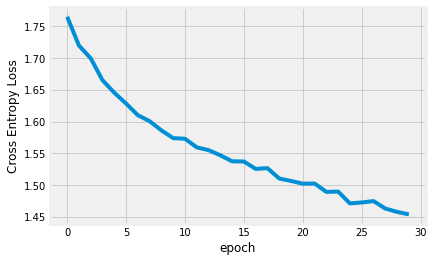

In [113]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

# Graph WaveNet

In [117]:
df = pd.read_csv('traffic_new.csv')
df.head()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic,year,month,day,is_weekend
0,2017-09-24,Saturday,6,32,21,38,Normal,2017,9,24,1
1,2017-02-12,Saturday,6,103,36,16,Normal,2017,2,12,1
2,2017-08-14,Sunday,7,79,21,15,Normal,2017,8,14,1
3,2017-05-15,Sunday,7,65,13,40,Normal,2017,5,15,1
4,2017-04-16,Saturday,6,93,36,20,Normal,2017,4,16,1


In [120]:
df = df[['Day', 'CodedDay', 'Zone', 'Weather', 'Temperature','year', 'month', 'day', 'is_weekend','Traffic']]

In [123]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Day']= label_encoder.fit_transform(df['Day'])
df['Traffic']= label_encoder.fit_transform(df['Traffic'])

df['Day'].unique()
df['Traffic'].unique()

array([3, 2, 0, 1, 4])

In [124]:
X = df.drop('Traffic', axis =1).values
y = df['Traffic'].values

In [125]:
X

array([[  2,   6,  32, ...,   9,  24,   1],
       [  2,   6, 103, ...,   2,  12,   1],
       [  3,   7,  79, ...,   8,  14,   1],
       ...,
       [  5,   2,  32, ...,   8,  30,   0],
       [  2,   6,  74, ...,   3,   5,   1],
       [  3,   7,  36, ...,   8,  21,   1]], dtype=int64)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [128]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train) ## LongTensor dosent converts it into floating point 
y_test = torch.LongTensor(y_test)

In [131]:
class GCN(nn.Module):
    def __init__(self, in_count, output_count):
        super(GCN, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, output_count)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return self.softmax(x)

In [135]:
model = GCN(X.shape[1], 5) 

In [136]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [139]:
final_losses = []
for epochs in range(1000):
    optimizer.zero_grad()
    out = model(X_train)
    loss = criterion(out, y_train)
    final_losses.append(loss)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epochs+1}, loss: {loss.item()}")

<ipython-input-131-014a663a2e33>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


Epoch 1, loss: 1.7050806283950806
Epoch 2, loss: 1.7050806283950806
Epoch 3, loss: 1.7050806283950806
Epoch 4, loss: 1.7050806283950806
Epoch 5, loss: 1.7050806283950806
Epoch 6, loss: 1.7050806283950806
Epoch 7, loss: 1.7050806283950806
Epoch 8, loss: 1.7050806283950806
Epoch 9, loss: 1.7050806283950806
Epoch 10, loss: 1.7050806283950806
Epoch 11, loss: 1.7050806283950806
Epoch 12, loss: 1.7050806283950806
Epoch 13, loss: 1.7050806283950806
Epoch 14, loss: 1.7050806283950806
Epoch 15, loss: 1.7050806283950806
Epoch 16, loss: 1.7050806283950806
Epoch 17, loss: 1.7050806283950806
Epoch 18, loss: 1.7050806283950806
Epoch 19, loss: 1.7050806283950806
Epoch 20, loss: 1.7050806283950806
Epoch 21, loss: 1.7050806283950806
Epoch 22, loss: 1.7050806283950806
Epoch 23, loss: 1.7050806283950806
Epoch 24, loss: 1.7050806283950806
Epoch 25, loss: 1.7050806283950806
Epoch 26, loss: 1.7050806283950806
Epoch 27, loss: 1.7050806283950806
Epoch 28, loss: 1.7050806283950806
Epoch 29, loss: 1.70508062839

Epoch 267, loss: 1.7050806283950806
Epoch 268, loss: 1.7050806283950806
Epoch 269, loss: 1.7050806283950806
Epoch 270, loss: 1.7050806283950806
Epoch 271, loss: 1.7050806283950806
Epoch 272, loss: 1.7050806283950806
Epoch 273, loss: 1.7050806283950806
Epoch 274, loss: 1.7050806283950806
Epoch 275, loss: 1.7050806283950806
Epoch 276, loss: 1.7050806283950806
Epoch 277, loss: 1.7050806283950806
Epoch 278, loss: 1.7050806283950806
Epoch 279, loss: 1.7050806283950806
Epoch 280, loss: 1.7050806283950806
Epoch 281, loss: 1.7050806283950806
Epoch 282, loss: 1.7050806283950806
Epoch 283, loss: 1.7050806283950806
Epoch 284, loss: 1.7050806283950806
Epoch 285, loss: 1.7050806283950806
Epoch 286, loss: 1.7050806283950806
Epoch 287, loss: 1.7050806283950806
Epoch 288, loss: 1.7050806283950806
Epoch 289, loss: 1.7050806283950806
Epoch 290, loss: 1.7050806283950806
Epoch 291, loss: 1.7050806283950806
Epoch 292, loss: 1.7050806283950806
Epoch 293, loss: 1.7050806283950806
Epoch 294, loss: 1.705080628

Epoch 506, loss: 1.7050806283950806
Epoch 507, loss: 1.7050806283950806
Epoch 508, loss: 1.7050806283950806
Epoch 509, loss: 1.7050806283950806
Epoch 510, loss: 1.7050806283950806
Epoch 511, loss: 1.7050806283950806
Epoch 512, loss: 1.7050806283950806
Epoch 513, loss: 1.7050806283950806
Epoch 514, loss: 1.7050806283950806
Epoch 515, loss: 1.7050806283950806
Epoch 516, loss: 1.7050806283950806
Epoch 517, loss: 1.7050806283950806
Epoch 518, loss: 1.7050806283950806
Epoch 519, loss: 1.7050806283950806
Epoch 520, loss: 1.7050806283950806
Epoch 521, loss: 1.7050806283950806
Epoch 522, loss: 1.7050806283950806
Epoch 523, loss: 1.7050806283950806
Epoch 524, loss: 1.7050806283950806
Epoch 525, loss: 1.7050806283950806
Epoch 526, loss: 1.7050806283950806
Epoch 527, loss: 1.7050806283950806
Epoch 528, loss: 1.7050806283950806
Epoch 529, loss: 1.7050806283950806
Epoch 530, loss: 1.7050806283950806
Epoch 531, loss: 1.7050806283950806
Epoch 532, loss: 1.7050806283950806
Epoch 533, loss: 1.705080628

Epoch 781, loss: 1.7050806283950806
Epoch 782, loss: 1.7050806283950806
Epoch 783, loss: 1.7050806283950806
Epoch 784, loss: 1.7050806283950806
Epoch 785, loss: 1.7050806283950806
Epoch 786, loss: 1.7050806283950806
Epoch 787, loss: 1.7050806283950806
Epoch 788, loss: 1.7050806283950806
Epoch 789, loss: 1.7050806283950806
Epoch 790, loss: 1.7050806283950806
Epoch 791, loss: 1.7050806283950806
Epoch 792, loss: 1.7050806283950806
Epoch 793, loss: 1.7050806283950806
Epoch 794, loss: 1.7050806283950806
Epoch 795, loss: 1.7050806283950806
Epoch 796, loss: 1.7050806283950806
Epoch 797, loss: 1.7050806283950806
Epoch 798, loss: 1.7050806283950806
Epoch 799, loss: 1.7050806283950806
Epoch 800, loss: 1.7050806283950806
Epoch 801, loss: 1.7050806283950806
Epoch 802, loss: 1.7050806283950806
Epoch 803, loss: 1.7050806283950806
Epoch 804, loss: 1.7050806283950806
Epoch 805, loss: 1.7050806283950806
Epoch 806, loss: 1.7050806283950806
Epoch 807, loss: 1.7050806283950806
Epoch 808, loss: 1.705080628

Text(0, 0.5, 'loss')

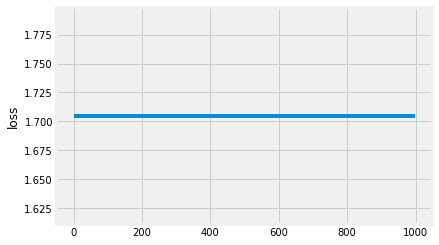

In [141]:
plt.plot(range(1000), final_losses)
plt.ylabel('loss')

In [142]:
from sklearn.metrics import accuracy_score

pred = model(X_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print(f"Accurcay :   {correct}")

Accurcay :   0.20066666666666666


<ipython-input-131-014a663a2e33>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(x)


# DL

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          5000 non-null   int32
 1   CodedDay     5000 non-null   int64
 2   Zone         5000 non-null   int64
 3   Weather      5000 non-null   int64
 4   Temperature  5000 non-null   int64
 5   year         5000 non-null   int64
 6   month        5000 non-null   int64
 7   day          5000 non-null   int64
 8   is_weekend   5000 non-null   int64
 9   Traffic      5000 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 351.7 KB


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [147]:
X_train = X_train
X_test = X_test

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [148]:
print(X_train.shape)
print(X_test.shape)

(3500, 9, 1)
(1500, 9, 1)


In [149]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [150]:
print(Y_train.shape)
print(Y_test.shape)

(3500, 5)
(1500, 5)


In [151]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)

# CNN

In [152]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    #cnnmodel.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    #cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 128)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [153]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
2/2 [==============================] - 0s 67ms/step - loss: 170.0864 - accuracy: 0.2656 - val_loss: 74.9810 - val_accuracy: 0.1871
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 64.7749 - accuracy: 0.1562 - val_loss: 30.5837 - val_accuracy: 0.1957
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 45.3203 - accuracy: 0.2188 - val_loss: 33.3853 - val_accuracy: 0.2043
Epoch 4/20
2/2 [==============================] - 0s 17ms/step - loss: 45.5130 - accuracy: 0.2031 - val_loss: 38.8777 - val_accuracy: 0.2086
Epoch 5/20
2/2 [==============================] - 0s 16ms/step - loss: 35.9026 - accuracy: 0.2344 - val_loss: 28.0396 - val_accuracy: 0.2114
Epoch 6/20
2/2 [==============================] - 0s 16ms/step - loss: 38.5464 - accuracy: 0.1719 - val_loss: 21.8220 - val_accuracy: 0.1871
Epoch 7/20
2/2 [==============================] - 0s 16ms/step - loss: 27.3918 - accuracy: 0.1094 - val_loss: 23.3081 - val_accuracy: 0.2043
Epoch 8/20
2

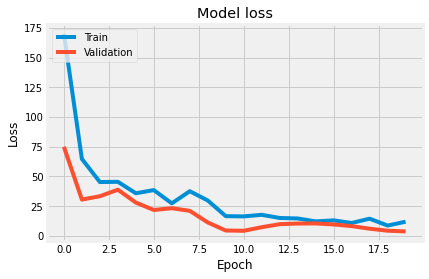

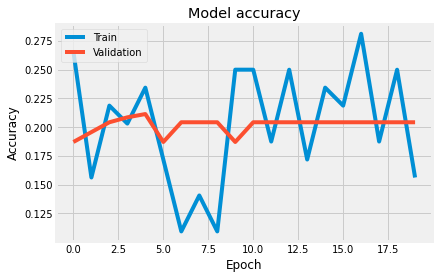

In [154]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [155]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)
showResults(cnn_actual_value, cnn_predict)

47/47 [==============================] - 0s 658us/step
Accuracy  : 0.19333333333333333
Precision : 0.037377777777777774
f1Score : 0.06264432029795158
[[  0   0   0   0 284]
 [  0   0   0   0 301]
 [  0   0   0   0 309]
 [  0   0   0   0 316]
 [  0   0   0   0 290]]


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN + CNN

In [156]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 32)             6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 7, 128)            20608     
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [157]:
history = model.fit(X_train, Y_train,epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 4ms/step - loss: 0.2353 - acc: 0.1989
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1837 - acc: 0.1909
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1777 - acc: 0.2003
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1732 - acc: 0.1946
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1696 - acc: 0.2077
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1692 - acc: 0.1923
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1677 - acc: 0.2009
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1662 - acc: 0.2083
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1662 - acc: 0.1986
Epoch 10/100
110/110 [==============================] - 0s 4ms/step - loss: 0.1665 - acc: 0.1929
Epoch 11/100
110/110 [=================

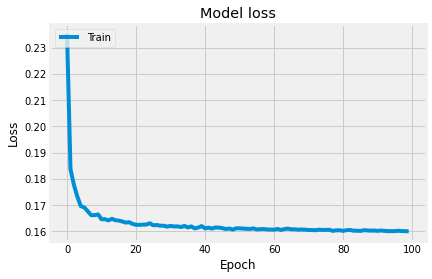

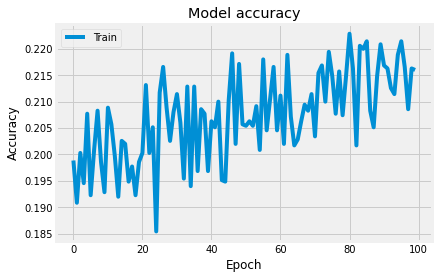

In [158]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

# DCRNN - Disfusion CNN with RNN and GRU

In [160]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 32)             6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
gru (GRU)                    (None, 7, 128)            62208     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 7, 128)            32896     
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [161]:
history = model.fit(X_train, Y_train,epochs=100)

Epoch 1/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2152 - acc: 0.1931
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1765 - acc: 0.2000
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1714 - acc: 0.2037
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1696 - acc: 0.1977
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1669 - acc: 0.1983
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 0.1669 - acc: 0.2034
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1658 - acc: 0.2054
Epoch 8/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1656 - acc: 0.2066
Epoch 9/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1651 - acc: 0.1851
Epoch 10/100
110/110 [==============================] - 1s 7ms/step - loss: 0.1642 - acc: 0.2109
Epoch 11/100
110/110 [=================

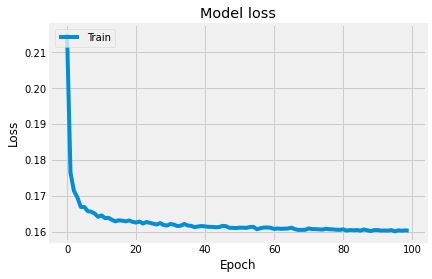

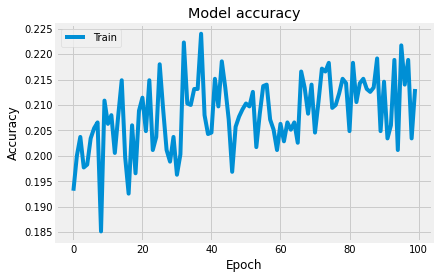

In [162]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

# Machine Learning

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          5000 non-null   int32
 1   CodedDay     5000 non-null   int64
 2   Zone         5000 non-null   int64
 3   Weather      5000 non-null   int64
 4   Temperature  5000 non-null   int64
 5   year         5000 non-null   int64
 6   month        5000 non-null   int64
 7   day          5000 non-null   int64
 8   is_weekend   5000 non-null   int64
 9   Traffic      5000 non-null   int32
dtypes: int32(2), int64(8)
memory usage: 351.7 KB


In [187]:
df['is_weekend'].value_counts()

0    3579
1    1421
Name: is_weekend, dtype: int64

In [173]:
df.shape

(5000, 10)

In [174]:
X = df.iloc[:, 0:9]
y = df.iloc[:,9]

In [175]:
X

,Day,CodedDay,Zone,Weather,Temperature,year,month,day,is_weekend
0,2,6,32,21,38,2017,9,24,1
1,2,6,103,36,16,2017,2,12,1
2,3,7,79,21,15,2017,8,14,1
3,3,7,65,13,40,2017,5,15,1
4,2,6,93,36,20,2017,4,16,1
...,...,...,...,...,...,...,...,...,...
4995,0,5,130,45,45,2017,5,20,0
4996,3,7,90,4,8,2017,2,20,1
4997,5,2,32,21,11,2017,8,30,0
4998,2,6,74,33,12,2017,3,5,1


In [176]:
y

0       3
1       3
2       3
3       3
4       3
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Name: Traffic, Length: 5000, dtype: int32

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [183]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X)
val1 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y, predictions))

*Accuracy score for SVM:  21.98 

*Confusion Matrix for SVM: 
[[496  17  13 112 362]
 [475  22  17 108 378]
 [469  17  13 109 392]
 [454  13  12 137 384]
 [443  19   6 101 431]]


# RAndom Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
predictions = RF.predict(X)
val2 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y, predictions))

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[1000    0    0    0    0]
 [   0 1000    0    0    0]
 [   0    0 1000    0    0]
 [   0    0    0 1000    0]
 [   0    0    0    0 1000]]


# Decison Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X, y)
predictions = DT.predict(X)
val3 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for DT: ", val3, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y, predictions))

*Accuracy score for DT:  100.0 

*Confusion Matrix for DT: 
[[1000    0    0    0    0]
 [   0 1000    0    0    0]
 [   0    0 1000    0    0]
 [   0    0    0 1000    0]
 [   0    0    0    0 1000]]


# MLP

In [182]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X, y)
predictions = MLP.predict(X)
val4 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for MLP: ", val4, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y, predictions))

*Accuracy score for MLP:  20.7 

*Confusion Matrix for MLP: 
[[765   0 235   0   0]
 [745   0 255   0   0]
 [730   0 270   0   0]
 [761   0 239   0   0]
 [761   0 239   0   0]]


# Voting Classifier

In [184]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[1000    0    0    0    0]
 [   0 1000    0    0    0]
 [   0    0 1000    0    0]
 [   0    0    0 1000    0]
 [   0    0    0    0 1000]]


In [186]:
val5 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Voting: ", val5, "\n")

*Accuracy score for Voting:  100.0 



In [188]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']